In [1]:
%matplotlib widget
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")
from because.synth import gen_data
from because.probability.prob import ProbSpace
from because.visualization import cmodel
from because.visualization import viz
from because.synth import read_data
from because.causality import cdisc
r = read_data.Reader('/home/roger/Datasets/llcp.csv')
ds = r.read()


ps0 = ProbSpace(ds, power=5)
ps = ps0.SubSpace([('income', 0,9),('education',[1,2,3,4,5,6]), ('smokertype',[1,2,3,4]),('othercancer','yes','no'),
                   ('skincancer', 'yes','no'), ('diabetes', 'yes','no'), ('asthma', 'yes', 'no'), ('copd','yes','no'), ('arthritis','yes','no'), 
                   ('kidneydis','yes','no'), ('depression','yes','no'), ('veteran','yes', 'no')], power=5)

print('N = ', ps.N)
print('Variables = ', ps.getVarNames())

getData:  290759 records read.
N =  285103
Variables =  ['age', 'gender', 'weight', 'height', 'ageGroup', 'genhealth', 'asthma_ever', 'asthma', 'skincancer', 'othercancer', 'copd', 'arthritis', 'depression', 'kidneydis', 'diabetes', 'maritaldetail', 'married', 'education', 'veteran', 'income', 'state', 'childcnt', 'sleephours', 'employment', 'smokertype', 'physicalactivity', 'insurance', 'checkup', 'nohospitalcost', 'bmi', 'bmicat', 'drinks']


In [12]:
ps.P([('gender','male')], [('veteran', 'yes')])

0.8969209085488156

Pass 1 of 4
    independence test:  ('gender', 'veteran', []) = False
    independence test:  ('gender', 'age', []) = True
    independence test:  ('veteran', 'age', []) = False
    gender -- age are independent
Pass 2 of 4
    independence test:  ('gender', 'veteran', ['age']) = False
    independence test:  ('veteran', 'age', ['gender']) = False
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
cdisc.dirDE: entropies gender veteran = 0.6924489298478177 0.3852557153778255 0.9989926371603164 0.3506748644190809 0.4803536959899873
      cdisc.discover: Differential Entropy for ('gender', 'veteran') is 0.4803536959899873
      No triangles for vertex =  gender
      No triangles for vertex =  age
triangles =  [('veteran', 'gender', 'age')]
      cdisc.discover.triangulation1: isInd, isIndC =  True False
      cdisc.discover.triangulation1 ('veteran', 'gender', 'age') .  Vertex is collider. Adjusting link ('veteran', 'gender') by -0.3
      cdisc.discover.triangulation1 ('veteran', 'gender', 

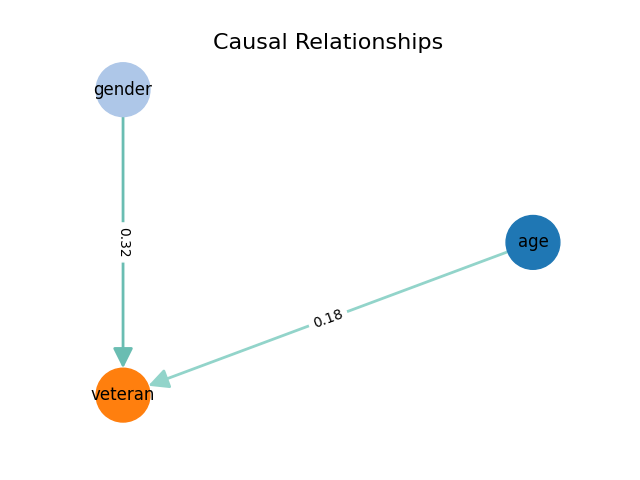

In [2]:
cg = cdisc.discover(ps=ps, varNames=['gender', 'veteran', 'age'],
        power=10, sensitivity=5, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, edgeLabels='corr')

Viz.show: Target =  [('age',)] , Condition =  [('veteran',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Elapsed Time =  2.921


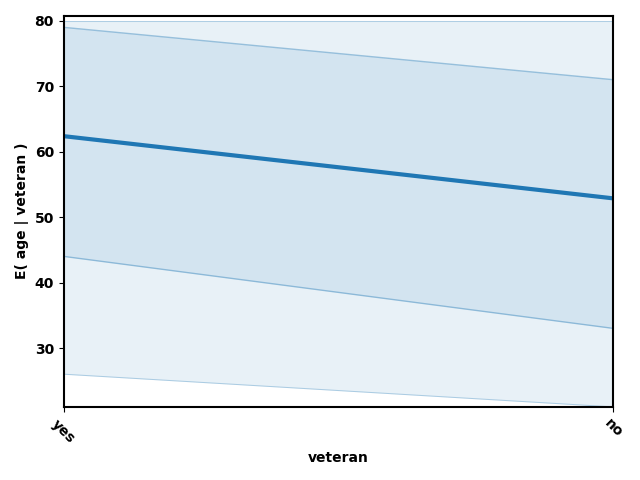

Viz.show: Target =  [('veteran', 'yes')] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  14.531


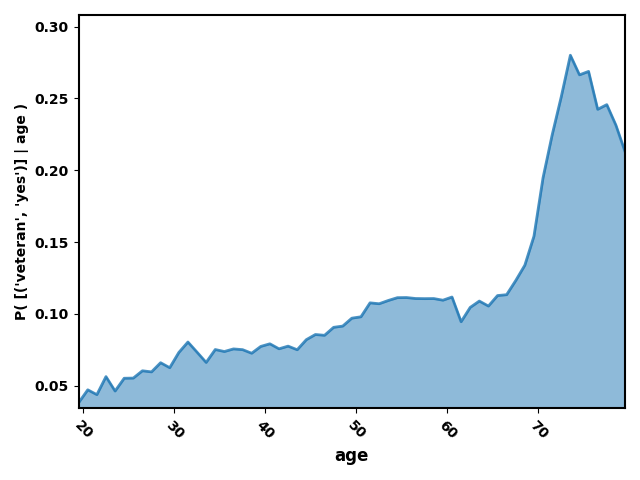

In [3]:
viz.show(probspace=ps, targetSpec=['age'],
         condSpec=['veteran'], filtSpec=[], gtype='exp')
viz.show(probspace=ps, targetSpec=[('veteran','yes')],
         condSpec=['age'], filtSpec=[], gtype='pdf')

Pass 1 of 4
    independence test:  ('age', 'veteran', []) = False
Pass 2 of 4
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
      No triangles for vertex =  age
      No triangles for vertex =  veteran
triangles =  []
  cdisc.discover: found causal link: veteran -> age ( -0.0 )
cDisc.discover: Duration =  0.3
cmodel.show: Analyzing Graph Relations.
cGraph.intervene: target, doList, controlFor =  age [('veteran', 1.0)] []
findBackdoorBloockingSet: parents =  []
findBackdoorBloockingSet: pathNodes =  dict_keys([])
findBackdoorBloockingSet: combos =  []
findBackdoorBloockingSet: BDblocking =  []
cGraph.intervene: backward blocking set =  []
cGraph.intervene: ProbSpace query = distr( age [('veteran', 1.0)] )
cGraph.MDE: effVal for causeVal 1.0 = 52.86765991563562
cGraph.intervene: target, doList, controlFor =  age [('veteran', 3.0)] []
cGraph.intervene: backward blocking set =  []
cGraph.intervene: ProbSpace query = distr( age [('veteran', 3.0)] )
cGraph.MDE: effVal for causeVal 3.0 = 62

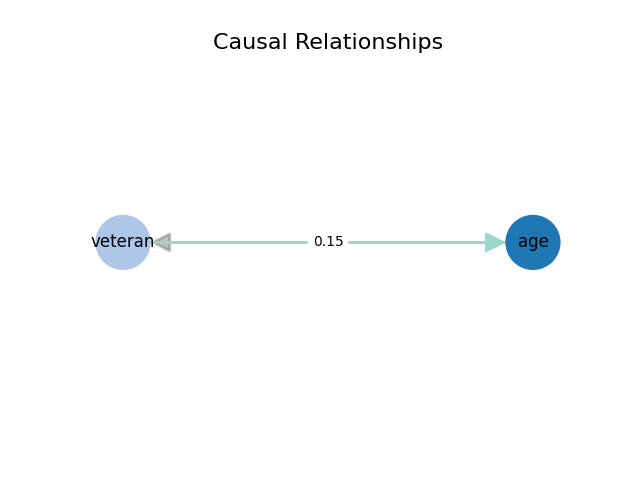

In [3]:
cg = cdisc.discover(ps=ps, varNames=['age', 'veteran'],
        power=10, sensitivity=5, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, edgeLabels='mde')

Pass 1 of 4
    independence test:  ('skincancer', 'veteran', []) = False
Pass 2 of 4
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
cdisc.dirDE: entropies skincancer veteran = 0.3073136436799261 0.3852557153778255 0.2797289333550914 0.3506748644190809 -0.11254045631464335
      cdisc.discover: Differential Entropy for ('skincancer', 'veteran') is -0.11254045631464335
      No triangles for vertex =  skincancer
      No triangles for vertex =  veteran
triangles =  []
  cdisc.discover: found causal link: veteran -> skincancer ( 0.11254045631464335 )
cDisc.discover: Duration =  2.2
cmodel.show: Analyzing Graph Relations.
cGraph.intervene: target, doList, controlFor =  skincancer [('veteran', 1.0)] []
findBackdoorBloockingSet: parents =  []
findBackdoorBloockingSet: pathNodes =  dict_keys([])
findBackdoorBloockingSet: combos =  []
findBackdoorBloockingSet: BDblocking =  []
cGraph.intervene: backward blocking set =  []
cGraph.intervene: ProbSpace query = distr( skincancer [('veteran', 1.0)

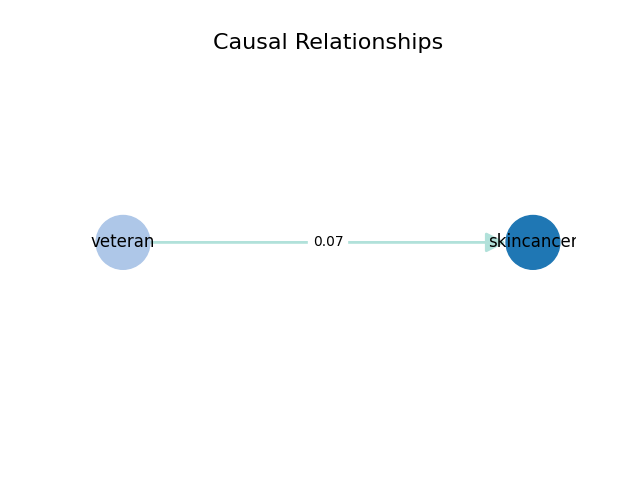

In [3]:
cg = cdisc.discover(ps=ps, varNames=['skincancer', 'veteran'],
        power=10, sensitivity=5, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, edgeLabels='mde')

Pass 1 of 4
    independence test:  ('gender', 'height', []) = False
    independence test:  ('gender', 'weight', []) = False
    independence test:  ('gender', 'genhealth', []) = True
    independence test:  ('height', 'weight', []) = False
    independence test:  ('height', 'genhealth', []) = False
    independence test:  ('weight', 'genhealth', []) = False
    gender -- genhealth are independent
Pass 2 of 4
    independence test:  ('gender', 'height', ['weight']) = False
    independence test:  ('gender', 'height', ['genhealth']) = False
    independence test:  ('gender', 'weight', ['height']) = True
    independence test:  ('gender', 'weight', ['genhealth']) = False
    independence test:  ('height', 'weight', ['gender']) = False
    independence test:  ('height', 'weight', ['genhealth']) = False
    independence test:  ('height', 'genhealth', ['gender']) = True
    independence test:  ('height', 'genhealth', ['weight']) = True
    independence test:  ('weight', 'genhealth', ['gend

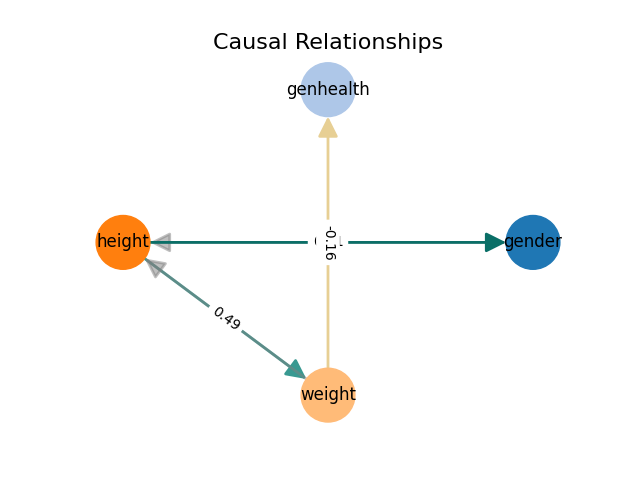

In [3]:
cg = cdisc.discover(ps=ps, varNames=['gender', 'height', 'weight', 'genhealth'],
        power=4, sensitivity=5, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, edgeLabels='corr')
#print('Model score =', cg.TestModel(order=3, power=5, sensitivity=6, testDirections=False, verbosity=3)[0])


In [31]:
from math import log
def h0(p):
    if p > 0:
        return p * log(1/p)
    else:
        return 0
    
def h(hist):
    cum = 0
    for p in hist:
        cum += h0(p)
    return cum



def dirOld(ps, rv1, rv2, verbosity=1):
    d1 = ps.distr(rv1)
    d2 = ps.distr(rv2)
    hist1 = d1.ToHistogram()
    hist2 = d2.ToHistogram()
    h1 = h(hist1)
    h2 = h(hist2)
    h1_cl = []
    h2_cl = []
    v1 = ps.getValues(rv1)
    v2 = ps.getValues(rv2)
    maxEnt1 = h([1/len(v1)] * len(v1))
    maxEnt2 = h([1/len(v2)] * len(v2))
    print('maxEnt1, maxEnt2 = ', maxEnt1, maxEnt2)
    for v in v2:
        try:
            d = ps.distr(rv1, (rv2, v))
        except:
            continue
        hist = d.ToHistogram()
        if len(hist) < 2 or len(hist) > len(v1):
            continue
        h1_cl.append(h(hist))
    for v in v1:
        try:
            d = ps.distr(rv2, (rv1, v))
        except:
            continue
        hist = d.ToHistogram()
        if len(hist) < 2 or len(hist) > len(v2):
            continue
        h2_cl.append(h(hist))
    de = de2 = 0
    if True:
        h1_c = sum(h1_cl)
        h2_c = sum(h2_cl)
        h1_cs = h1_c / len(v2)
        h2_cs = h2_c / len(v1)
        diffh1 = h1_cs / maxEnt1
        diffh2 = h2_cs / maxEnt2
        de = (diffh1 - diffh2) / (diffh1 + diffh2)
    if False:
        h1_c = min(h1_cl)
        h2_c = min(h2_cl)
        h1_cs = h1_c
        h2_cs = h2_c
        diffh1 = h1_cs
        diffh2 = h2_cs
        de = (diffh2 - diffh1) / (diffh1 + diffh2)
    de = (h1 - h2) / (h2 + h1)
    vprint(1, verbosity, 'entropies', rv1, rv2, '=', h1, h2, h1_cs, h2_cs, diffh1, diffh2, de, de2)
    return de

def dir(ps, rv1, rv2, verbosity=1):
    d1 = ps.distr(rv1)
    d2 = ps.distr(rv2)
    hist1 = d1.ToHistogram()
    hist2 = d2.ToHistogram()
    h1 = h(hist1)
    h2 = h(hist2)
    v1 = ps.getValues(rv1)
    v2 = ps.getValues(rv2)
    maxEnt1 = h([1/len(v1)] * len(v1))
    maxEnt2 = h([1/len(v2)] * len(v2))
    h1_s = h1 / maxEnt1
    h2_s = h2 / maxEnt2
    de = (h1_s - h2_s) / (h2_s + h1_s)
    vprint(1, verbosity, 'entropies', rv1, rv2, '=', h1,h2, h1_s, h2_s, de)
    return de

In [34]:

print(dir(ps, 'gender', 'veteran'))
print(dir(ps, 'veteran', 'skincancer'))
print(dir(ps, 'gender', 'othercancer'))
print(dir(ps, 'gender', 'diabetes'))
print(dir(ps, 'veteran', 'smokertype'))
print(dir(ps, 'gender', 'height'))
print(dir(ps, 'employment', 'income'))
#print(dir(ps, 'age', 'veteran'))
#print(dir(ps, 'height', 'weight'))
#print(dir(ps, 'age', 'genhealth'))
#print(dir(ps, 'weight', 'genhealth'))




entropies gender veteran = 0.6924489298478177 0.3852557153778255 0.9989926371603164 0.3506748644190809 0.4803536959899873
0.4803536959899873
entropies veteran skincancer = 0.3852557153778255 0.3073136436799261 0.3506748644190809 0.2797289333550914 0.11254045631464335
0.11254045631464335
entropies gender othercancer = 0.6924489298478177 0.304244587739763 0.9989926371603164 0.2769353582496429 0.5659075445544045
0.5659075445544045
entropies gender diabetes = 0.6924489298478177 0.3827945481217158 0.9989926371603164 0.5522557962545311 0.28798536152095194
0.28798536152095194
entropies veteran smokertype = 0.3852557153778255 1.033713114739047 0.3506748644190809 0.7456663921679536 -0.36028155045309634
-0.36028155045309634
entropies gender height = 0.6924489298478177 2.819202908791839 0.9989926371603164 0.7322324233854514 0.15408754173808517
0.15408754173808517
entropies employment income = 1.4806748098573959 1.7921944309926272 0.7609163303743617 0.861863339300627 -0.06220623219077117
-0.062206

In [36]:
v = ps.getValues('height')
print('v = ', ps.getValues('height'))
for val in v:
    print('val = ', val)
    d = ps.distr('gender', ('height', val))
    hist = d.ToHistTuple()
    print('hist = ', hist)

v =  [36.0, 40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 90.0, 92.0]
val =  36.0
hist =  [(1.0, 1.1, 0.5), (1.1, 1.2, 0.0), (1.2, 1.3, 0.0), (1.3, 1.4, 0.0), (1.4, 1.5, 0.0), (1.5, 1.6, 0.0), (1.6, 1.7000000000000002, 0.0), (1.7000000000000002, 1.8, 0.0), (1.8, 1.9, 0.0), (1.9, 2.0, 0.5)]
val =  40.0
hist =  [(1.0, 1.0, 1.0)]
val =  41.0
hist =  [(1.0, 1.0, 1.0)]
val =  45.0
hist =  [(1.0, 1.0, 1.0)]
val =  46.0
hist =  [(1.0, 1.1, 0.5), (1.1, 1.2, 0.0), (1.2, 1.3, 0.0), (1.3, 1.4, 0.0), (1.4, 1.5, 0.0), (1.5, 1.6, 0.0), (1.6, 1.7000000000000002, 0.0), (1.7000000000000002, 1.8, 0.0), (1.8, 1.9, 0.0), (1.9, 2.0, 0.5)]
val =  47.0
hist =  [(2.0, 2.0, 1.0)]
val =  48.0
hist =  [(1.0, 1.0, 0.9375), (2.0, 2.0, 0.0625)]
val =  49.0
hist =  [(1.0, 1.0, 0.8181818181818182), (2.0

Pass 1 of 4
    independence test:  ('income', 'height', []) = False
    independence test:  ('income', 'weight', []) = False
    independence test:  ('income', 'genhealth', []) = False
    independence test:  ('income', 'gender', []) = False
    independence test:  ('income', 'age', []) = False
    independence test:  ('income', 'veteran', []) = True
    independence test:  ('height', 'weight', []) = False
    independence test:  ('height', 'genhealth', []) = False
    independence test:  ('height', 'gender', []) = False
    independence test:  ('height', 'age', []) = False
    independence test:  ('height', 'veteran', []) = False
    independence test:  ('weight', 'genhealth', []) = False
    independence test:  ('weight', 'gender', []) = False
    independence test:  ('weight', 'age', []) = False
    independence test:  ('weight', 'veteran', []) = False
    independence test:  ('genhealth', 'gender', []) = True
    independence test:  ('genhealth', 'age', []) = False
    independenc

    independence test:  ('weight', 'genhealth', ['gender', 'veteran']) = False
    independence test:  ('genhealth', 'age', ['gender', 'veteran']) = False
    independence test:  ('gender', 'veteran', ['genhealth', 'age']) = False
    independence test:  ('age', 'veteran', ['income', 'genhealth']) = False
    independence test:  ('age', 'veteran', ['income', 'gender']) = False
    independence test:  ('age', 'veteran', ['genhealth', 'gender']) = False
Pass 4 of 4
    independence test:  ('age', 'veteran', ['income', 'genhealth', 'gender']) = False
Detecting valid links.
        cdisc.testDirection: v1, v2, combo, rho, N =  income height [] 0.0163149977502978
      cdisc.testDirection: best combo for( income , height ) =  [] , rho =  0.0163149977502978
       cdisc.testDirection: avgRho =  0.0163149977502978
      cdisc.discover: Final direction for ('income', 'height') is 0.0163149977502978
        cdisc.testDirection: v1, v2, combo, rho, N =  income genhealth [] 0.03576163840429485
  

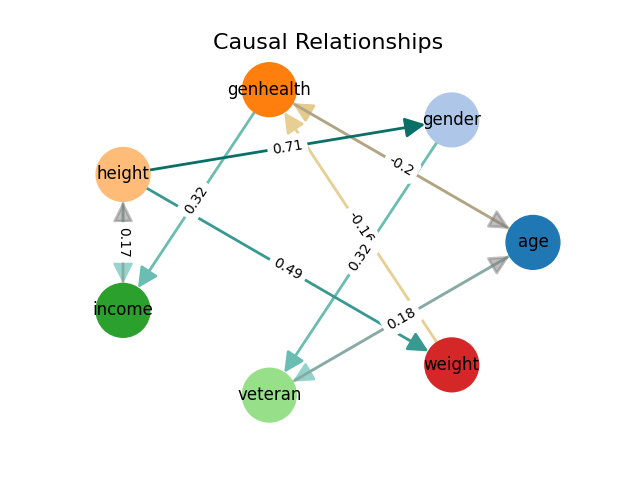

In [2]:
cg = cdisc.discover(ps=ps, varNames=['income', 'height', 'weight', 'genhealth', 'gender', 'age', 'veteran'],
        power=4, sensitivity=5, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, edgeLabels='corr', verbosity=1)
#print('Model score =', cg.TestModel(order=3, power=5, sensitivity=6, testDirections=False, verbosity=1)[0])


Pass 1 of 4
    independence test:  ('age', 'gender', []) = True
    independence test:  ('age', 'height', []) = False
    independence test:  ('age', 'weight', []) = False
    independence test:  ('age', 'bmi', []) = False
    independence test:  ('age', 'veteran', []) = False
    independence test:  ('age', 'smokertype', []) = False
    independence test:  ('age', 'physicalactivity', []) = False
    independence test:  ('age', 'income', []) = False
    independence test:  ('age', 'education', []) = False
    independence test:  ('age', 'genhealth', []) = False
    independence test:  ('gender', 'height', []) = False
    independence test:  ('gender', 'weight', []) = False
    independence test:  ('gender', 'bmi', []) = False
    independence test:  ('gender', 'veteran', []) = False
    independence test:  ('gender', 'smokertype', []) = False
    independence test:  ('gender', 'physicalactivity', []) = False
    independence test:  ('gender', 'income', []) = False
    independence tes

    independence test:  ('age', 'education', ['physicalactivity']) = True
    independence test:  ('age', 'education', ['income']) = True
    independence test:  ('age', 'education', ['genhealth']) = True
    independence test:  ('age', 'genhealth', ['gender']) = False
    independence test:  ('age', 'genhealth', ['height']) = False
    independence test:  ('age', 'genhealth', ['weight']) = False
    independence test:  ('age', 'genhealth', ['bmi']) = False
    independence test:  ('age', 'genhealth', ['veteran']) = False
    independence test:  ('age', 'genhealth', ['smokertype']) = False
    independence test:  ('age', 'genhealth', ['physicalactivity']) = True
    independence test:  ('age', 'genhealth', ['income']) = False
    independence test:  ('age', 'genhealth', ['education']) = False
    independence test:  ('gender', 'height', ['age']) = False
    independence test:  ('gender', 'height', ['weight']) = False
    independence test:  ('gender', 'height', ['bmi']) = False
    ind

    independence test:  ('height', 'income', ['gender']) = True
    independence test:  ('height', 'income', ['weight']) = True
    independence test:  ('height', 'income', ['bmi']) = False
    independence test:  ('height', 'income', ['veteran']) = False
    independence test:  ('height', 'income', ['smokertype']) = False
    independence test:  ('height', 'income', ['physicalactivity']) = True
    independence test:  ('height', 'income', ['education']) = True
    independence test:  ('height', 'income', ['genhealth']) = True
    independence test:  ('height', 'genhealth', ['age']) = True
    independence test:  ('height', 'genhealth', ['gender']) = True
    independence test:  ('height', 'genhealth', ['weight']) = True
    independence test:  ('height', 'genhealth', ['bmi']) = True
    independence test:  ('height', 'genhealth', ['veteran']) = True
    independence test:  ('height', 'genhealth', ['smokertype']) = True
    independence test:  ('height', 'genhealth', ['physicalactivity

    independence test:  ('smokertype', 'physicalactivity', ['veteran']) = True
    independence test:  ('smokertype', 'physicalactivity', ['income']) = True
    independence test:  ('smokertype', 'physicalactivity', ['education']) = True
    independence test:  ('smokertype', 'physicalactivity', ['genhealth']) = True
    independence test:  ('smokertype', 'income', ['age']) = False
    independence test:  ('smokertype', 'income', ['gender']) = False
    independence test:  ('smokertype', 'income', ['height']) = False
    independence test:  ('smokertype', 'income', ['weight']) = False
    independence test:  ('smokertype', 'income', ['bmi']) = False
    independence test:  ('smokertype', 'income', ['veteran']) = False
    independence test:  ('smokertype', 'income', ['physicalactivity']) = True
    independence test:  ('smokertype', 'income', ['education']) = True
    independence test:  ('smokertype', 'income', ['genhealth']) = True
    independence test:  ('smokertype', 'education', 

      conflicts resolved:  [(0.013807842873713061, ('height', 'physicalactivity', ('gender',))), (0.24218284855783326, ('gender', 'physicalactivity', ('height',)))]
    height -- physicalactivity is blocked by ('gender',)
      conflicts resolved:  [(0.0001742326411153794, ('gender', 'income', ('height',))), (0.08136855583818414, ('height', 'income', ('gender',)))]
    gender -- income is blocked by ('height',)
      conflicts resolved:  [(0.0013320057903227767, ('weight', 'income', ('gender',))), (0.1963727913822529, ('gender', 'income', ('weight',)))]
    weight -- income is blocked by ('gender',)
    gender -- income is blocked by ('veteran',)
    gender -- income is blocked by ('physicalactivity',)
    gender -- income is blocked by ('genhealth',)
      conflicts resolved:  [(0.010486294814062602, ('bmi', 'veteran', ('height',))), (0.019904416439065542, ('height', 'bmi', ('veteran',)))]
    bmi -- veteran is blocked by ('height',)
      conflicts resolved:  [(0.02316093399055369, (

    independence test:  ('age', 'veteran', ['gender', 'income']) = False
    independence test:  ('age', 'veteran', ['gender', 'genhealth']) = False
    independence test:  ('age', 'veteran', ['income', 'genhealth']) = False
    independence test:  ('age', 'genhealth', ['gender', 'veteran']) = False
    independence test:  ('gender', 'veteran', ['age', 'physicalactivity']) = False
    independence test:  ('gender', 'veteran', ['age', 'education']) = False
    independence test:  ('gender', 'veteran', ['age', 'genhealth']) = False
    independence test:  ('gender', 'veteran', ['physicalactivity', 'education']) = False
    independence test:  ('gender', 'veteran', ['physicalactivity', 'genhealth']) = False
    independence test:  ('gender', 'veteran', ['education', 'genhealth']) = False
    independence test:  ('gender', 'physicalactivity', ['veteran', 'education']) = False
    independence test:  ('gender', 'physicalactivity', ['veteran', 'genhealth']) = False
    independence test:  ('

      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  True True
      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  True True
      cdisc.discover.triangulation1: isInd, isIndC =  False False
      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  False False
      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  False True
      cdisc.discover.triangulation1: isInd, isIndC =  False False
      cdisc.discover.tri

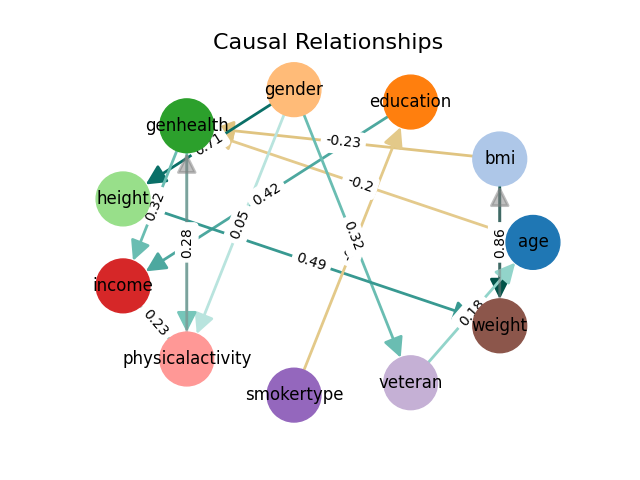

In [4]:
cg = cdisc.discover(ps=ps, varNames=['age', 'gender', 'height', 'weight', 'bmi', 'veteran', 'smokertype', 'physicalactivity', 'income', 'education', 'genhealth'],
        power=4, sensitivity=5, maxLevel=3, verbosity=4)
cmodel.show(cg=cg)
#print('Model score =', cg.TestModel(order=3, power=5, sensitivity=7, testDirections=False, verbosity=3)[0])

In [5]:
def condEff(cvar, v1, v2):
    dep1 = ps.dependence(v1, v2)
    dep2 = ps.dependence(v1, v2, [cvar])
    cEff = dep2 - dep1
    print((cvar, v1, v2), ': condEff =', cEff)
    return cEff

In [9]:
condEff('veteran', 'gender', 'age')
condEff('bmi', 'weight', 'genhealth')
condEff('height', 'gender', 'weight')



('veteran', 'gender', 'age') : condEff = 0.06977621846237281
('bmi', 'weight', 'genhealth') : condEff = -0.982107015260866
('height', 'gender', 'weight') : condEff = -0.9786046583431842


-0.9786046583431842

Pass 1 of 4
    independence test:  ('age', 'gender', []) = True
    independence test:  ('age', 'height', []) = False
    independence test:  ('age', 'weight', []) = False
    independence test:  ('age', 'bmi', []) = False
    independence test:  ('age', 'veteran', []) = False
    independence test:  ('age', 'smokertype', []) = False
    independence test:  ('age', 'physicalactivity', []) = False
    independence test:  ('age', 'income', []) = False
    independence test:  ('age', 'education', []) = False
    independence test:  ('age', 'genhealth', []) = False
    independence test:  ('age', 'diabetes', []) = False
    independence test:  ('age', 'copd', []) = False
    independence test:  ('gender', 'height', []) = False
    independence test:  ('gender', 'weight', []) = False
    independence test:  ('gender', 'bmi', []) = False
    independence test:  ('gender', 'veteran', []) = False
    independence test:  ('gender', 'smokertype', []) = False
    independence test:  ('gender', '

    independence test:  ('age', 'smokertype', ['bmi']) = True
    independence test:  ('age', 'smokertype', ['veteran']) = True
    independence test:  ('age', 'smokertype', ['physicalactivity']) = True
    independence test:  ('age', 'smokertype', ['income']) = False
    independence test:  ('age', 'smokertype', ['education']) = False
    independence test:  ('age', 'smokertype', ['genhealth']) = True
    independence test:  ('age', 'smokertype', ['diabetes']) = True
    independence test:  ('age', 'smokertype', ['copd']) = True
    independence test:  ('age', 'physicalactivity', ['gender']) = False
    independence test:  ('age', 'physicalactivity', ['height']) = False
    independence test:  ('age', 'physicalactivity', ['weight']) = False
    independence test:  ('age', 'physicalactivity', ['bmi']) = False
    independence test:  ('age', 'physicalactivity', ['veteran']) = False
    independence test:  ('age', 'physicalactivity', ['smokertype']) = False
    independence test:  ('age'

    independence test:  ('gender', 'smokertype', ['education']) = True
    independence test:  ('gender', 'smokertype', ['genhealth']) = True
    independence test:  ('gender', 'smokertype', ['diabetes']) = True
    independence test:  ('gender', 'smokertype', ['copd']) = True
    independence test:  ('gender', 'physicalactivity', ['age']) = False
    independence test:  ('gender', 'physicalactivity', ['height']) = True
    independence test:  ('gender', 'physicalactivity', ['weight']) = False
    independence test:  ('gender', 'physicalactivity', ['bmi']) = False
    independence test:  ('gender', 'physicalactivity', ['veteran']) = False
    independence test:  ('gender', 'physicalactivity', ['smokertype']) = False
    independence test:  ('gender', 'physicalactivity', ['income']) = True
    independence test:  ('gender', 'physicalactivity', ['education']) = False
    independence test:  ('gender', 'physicalactivity', ['genhealth']) = False
    independence test:  ('gender', 'physical

    independence test:  ('weight', 'veteran', ['education']) = False
    independence test:  ('weight', 'veteran', ['genhealth']) = False
    independence test:  ('weight', 'veteran', ['diabetes']) = False
    independence test:  ('weight', 'veteran', ['copd']) = False
    independence test:  ('weight', 'physicalactivity', ['age']) = True
    independence test:  ('weight', 'physicalactivity', ['gender']) = True
    independence test:  ('weight', 'physicalactivity', ['height']) = False
    independence test:  ('weight', 'physicalactivity', ['bmi']) = True
    independence test:  ('weight', 'physicalactivity', ['veteran']) = True
    independence test:  ('weight', 'physicalactivity', ['smokertype']) = True
    independence test:  ('weight', 'physicalactivity', ['income']) = True
    independence test:  ('weight', 'physicalactivity', ['education']) = True
    independence test:  ('weight', 'physicalactivity', ['genhealth']) = True
    independence test:  ('weight', 'physicalactivity', ['d

    independence test:  ('bmi', 'copd', ['genhealth']) = True
    independence test:  ('bmi', 'copd', ['diabetes']) = True
    independence test:  ('veteran', 'smokertype', ['age']) = True
    independence test:  ('veteran', 'smokertype', ['gender']) = True
    independence test:  ('veteran', 'smokertype', ['height']) = True
    independence test:  ('veteran', 'smokertype', ['weight']) = False
    independence test:  ('veteran', 'smokertype', ['bmi']) = False
    independence test:  ('veteran', 'smokertype', ['physicalactivity']) = False
    independence test:  ('veteran', 'smokertype', ['income']) = False
    independence test:  ('veteran', 'smokertype', ['education']) = False
    independence test:  ('veteran', 'smokertype', ['genhealth']) = False
    independence test:  ('veteran', 'smokertype', ['diabetes']) = False
    independence test:  ('veteran', 'smokertype', ['copd']) = False
    independence test:  ('veteran', 'diabetes', ['age']) = True
    independence test:  ('veteran', 

    independence test:  ('physicalactivity', 'education', ['bmi']) = False
    independence test:  ('physicalactivity', 'education', ['veteran']) = False
    independence test:  ('physicalactivity', 'education', ['smokertype']) = False
    independence test:  ('physicalactivity', 'education', ['income']) = True
    independence test:  ('physicalactivity', 'education', ['genhealth']) = False
    independence test:  ('physicalactivity', 'education', ['diabetes']) = False
    independence test:  ('physicalactivity', 'education', ['copd']) = False
    independence test:  ('physicalactivity', 'genhealth', ['age']) = False
    independence test:  ('physicalactivity', 'genhealth', ['gender']) = False
    independence test:  ('physicalactivity', 'genhealth', ['height']) = False
    independence test:  ('physicalactivity', 'genhealth', ['weight']) = False
    independence test:  ('physicalactivity', 'genhealth', ['bmi']) = False
    independence test:  ('physicalactivity', 'genhealth', ['vetera

    independence test:  ('education', 'copd', ['genhealth']) = True
    independence test:  ('education', 'copd', ['diabetes']) = True
    independence test:  ('genhealth', 'diabetes', ['age']) = False
    independence test:  ('genhealth', 'diabetes', ['gender']) = False
    independence test:  ('genhealth', 'diabetes', ['height']) = False
    independence test:  ('genhealth', 'diabetes', ['weight']) = False
    independence test:  ('genhealth', 'diabetes', ['bmi']) = False
    independence test:  ('genhealth', 'diabetes', ['veteran']) = False
    independence test:  ('genhealth', 'diabetes', ['smokertype']) = False
    independence test:  ('genhealth', 'diabetes', ['physicalactivity']) = False
    independence test:  ('genhealth', 'diabetes', ['income']) = False
    independence test:  ('genhealth', 'diabetes', ['education']) = False
    independence test:  ('genhealth', 'diabetes', ['copd']) = False
    independence test:  ('genhealth', 'copd', ['age']) = False
    independence test:

      conflicts resolved:  [(0.03520464623302916, ('height', 'physicalactivity', ('gender',))), (0.2202644579437386, ('gender', 'physicalactivity', ('height',)))]
    height -- physicalactivity is blocked by ('gender',)
      conflicts resolved:  [(0.43968907874349944, ('gender', 'income', ('physicalactivity',))), (0.48363902730828023, ('gender', 'physicalactivity', ('income',)))]
    gender -- income is blocked by ('physicalactivity',)
      conflicts resolved:  [(0.00018527007523799766, ('gender', 'income', ('height',))), (0.14960499838883318, ('height', 'income', ('gender',)))]
    gender -- income is blocked by ('height',)
      conflicts resolved:  [(0.0023540737779962906, ('weight', 'income', ('gender',))), (0.2713402069355727, ('gender', 'income', ('weight',)))]
    weight -- income is blocked by ('gender',)
    gender -- income is blocked by ('veteran',)
    gender -- income is blocked by ('genhealth',)
    gender -- income is blocked by ('copd',)
      conflicts resolved:  [(0

    independence test:  ('age', 'veteran', ['gender', 'physicalactivity']) = False
    independence test:  ('age', 'veteran', ['gender', 'income']) = False
    independence test:  ('age', 'veteran', ['gender', 'genhealth']) = False
    independence test:  ('age', 'veteran', ['physicalactivity', 'income']) = False
    independence test:  ('age', 'veteran', ['physicalactivity', 'genhealth']) = False
    independence test:  ('age', 'veteran', ['income', 'genhealth']) = False
    independence test:  ('age', 'diabetes', ['gender', 'income']) = False
    independence test:  ('gender', 'height', ['education', 'diabetes']) = False
    independence test:  ('gender', 'height', ['education', 'copd']) = False
    independence test:  ('gender', 'height', ['diabetes', 'copd']) = False
    independence test:  ('gender', 'veteran', ['age', 'physicalactivity']) = False
    independence test:  ('gender', 'veteran', ['age', 'education']) = False
    independence test:  ('gender', 'veteran', ['age', 'genh

    independence test:  ('gender', 'veteran', ['age', 'physicalactivity', 'education']) = False
    independence test:  ('gender', 'veteran', ['age', 'physicalactivity', 'genhealth']) = False
    independence test:  ('gender', 'veteran', ['age', 'education', 'genhealth']) = False
    independence test:  ('gender', 'veteran', ['physicalactivity', 'education', 'genhealth']) = False
    independence test:  ('height', 'weight', ['bmi', 'physicalactivity', 'education']) = False
    independence test:  ('height', 'weight', ['bmi', 'physicalactivity', 'diabetes']) = False
    independence test:  ('height', 'weight', ['bmi', 'physicalactivity', 'copd']) = False
    independence test:  ('height', 'weight', ['bmi', 'education', 'diabetes']) = False
    independence test:  ('height', 'weight', ['bmi', 'education', 'copd']) = False
    independence test:  ('height', 'weight', ['bmi', 'diabetes', 'copd']) = False
    independence test:  ('height', 'weight', ['physicalactivity', 'education', 'diabet

      cdisc.discover.triangulation2: isInd, isIndC =  False False
      cdisc.discover.triangulation2: isInd, isIndC =  False True
      cdisc.discover.triangulation2: isInd, isIndC =  False True
      cdisc.discover.triangulation2: isInd, isIndC =  False True
      cdisc.discover.triangulation2: isInd, isIndC =  False True
      cdisc.discover: triangulation2 ('genhealth', 'diabetes', 'copd') .  Vertex is medial.  Adjusting link ('genhealth', 'diabetes') by 0.2
      cdisc.discover.triangulation2: isInd, isIndC =  False True
      cdisc.discover: triangulation2 ('diabetes', 'age', 'bmi') .  Vertex is medial.  Adjusting link ('diabetes', 'bmi') by 0.2
      cdisc.discover.triangulation2: isInd, isIndC =  False False
      cdisc.discover.triangulation2: isInd, isIndC =  False False
      cdisc.discover.triangulation2: isInd, isIndC =  False False
  cdisc.discover: found causal link: veteran -> age ( 0.23436091734899467 )
  cdisc.discover: found causal link: age -> diabetes ( 0.2 )
  cdi

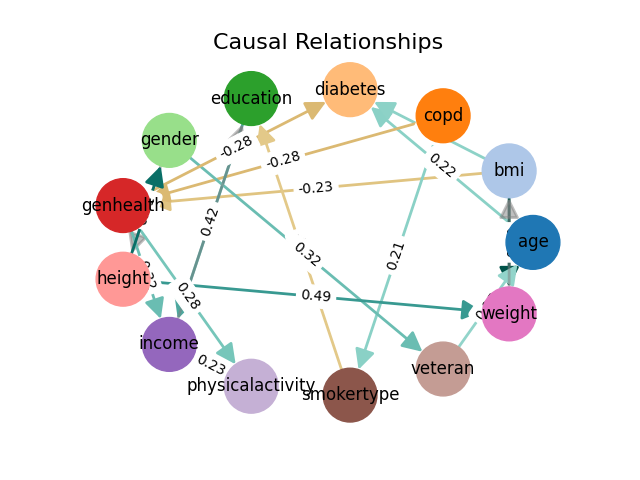

In [3]:
cg = cdisc.discover(ps=ps0, varNames=['age', 'gender', 'height', 'weight', 'bmi', 'veteran', 'smokertype', 'physicalactivity', 'income', 'education', 'genhealth', 'diabetes', 'copd'],
        power=5, sensitivity=5, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, verbosity=2)

In [12]:
print(ps.isIndependent('age', 'bmi', power=10))
print(ps.isIndependent('age', 'bmi', 'diabetes', power=10))
print(ps.isIndependent('veteran', 'diabetes', power=10))
print(ps.isIndependent('veteran', 'diabetes', 'age', power=10))
print(ps.isIndependent('age', 'genhealth', power=10))
print(ps.isIndependent('age', 'genhealth', 'diabetes', power=10))


False
False
False
True
False
False
